In [1]:
# Basic setting
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# Optimization Section
## [Problem 1] Linear Regression

In [2]:
# Making linear data
X = np.arange(-200, 200)
delta = np.random.uniform(-50, 50, size=(400,))
gamma = np.random.uniform(-30, 30, size=(400,))
y = 0.5*X + 13 + delta - gamma

with open('./data/linear_regression.pickle', 'wb') as f:
    pickle.dump([X, y], f)

In [3]:
# Load the dataset
with open('./data/linear_regression.pickle', 'rb') as f:
    X, y = pickle.load(f)

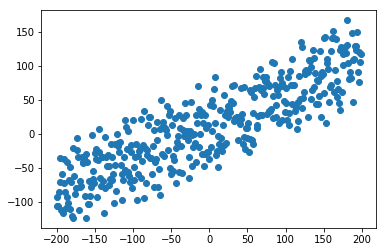

In [4]:
# Check the dataset distribution    
plt.scatter(X, y)
plt.show()

## [P1.1] You should find an optimal linear regression model using Gradient Descent <font color=red>without Tensorflow.</font>

### The best fit model should have the smallest difference between the predicted and real values for all data.
### Therefore, you should train the model to <font color=red>minimize the MSE(Mean Squared Error) loss.</font>
### You should fill in the blank which is about a loss function and gradients of model parameters.

**MSE loss**
\begin{equation*}
\left( \frac{1}{n} \sum_{i=1}^n (y_i - (wX_i + b))^2 \right)
\end{equation*}

**Gradients calculation**
\begin{equation*}
\frac{\partial L}{\partial w} = -2 * \frac{1}{n} \sum_{i=1}^n (y_i - (wX_i + b)) * X_i
\end{equation*}

\begin{equation*}
\frac{\partial L}{\partial b} = -2 * \frac{1}{n} \sum_{i=1}^n (y_i - (wX_i + b))
\end{equation*}

In [5]:
# Training setting
epochs = 1000
learning_rate = 1e-7

# Model weights and bias parameters
w = 0.0
b = 0.0

# Store model parameters and loss for visualization
w_list, b_list, loss_list = [], [], []

# Perform Gradient Descent
for i in range(epochs):
    
    
#################################################
######## Hint: use +, -, *, /, **, np.mean() ########
    loss = np.mean((y - (w*X + b))**2)   # MSE loss
    
    dw = -2 * np.mean((y - (w*X + b)) * X)   # derivative w.r.t to w
    db = -2 * np.mean(y - (w*X + b))   # derivative w.r.t to b
#################################################
    
    
    w = w - learning_rate * dw   # update w
    b = b - learning_rate * db   # update b
    
    w_list.append(w)
    b_list.append(b)
    loss_list.append(loss)

print('Trained model weights : %.4f' % w)
print('Trained model bias : %.4f' % b)

Trained model weights : 0.4463
Trained model bias : 0.0024


### Let's visualize the trained results.

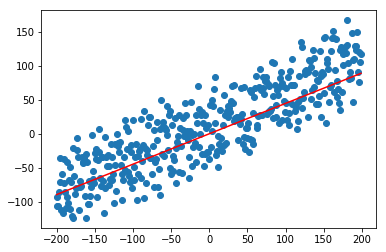

In [6]:
# Visualize the trained linear regression model
plt.scatter(X, y)   # scatter the original data
y_pred = w * X + b
plt.plot(X, y_pred, color='red')
plt.show()

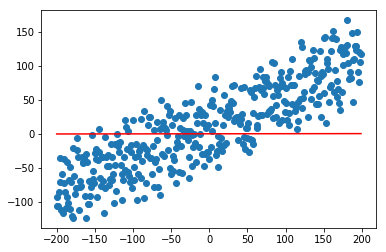

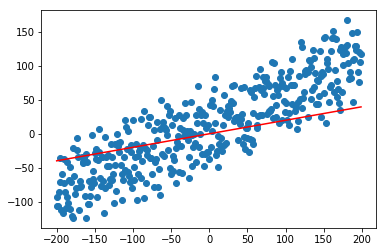

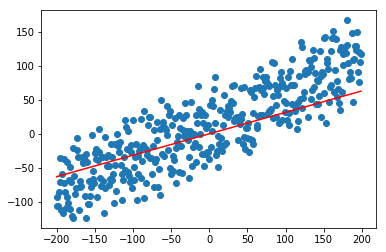

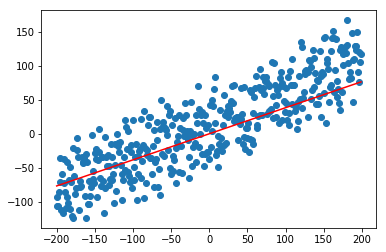

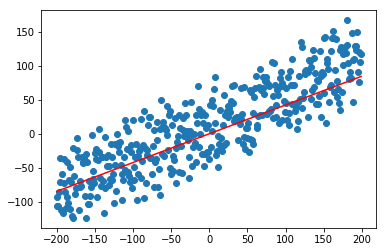

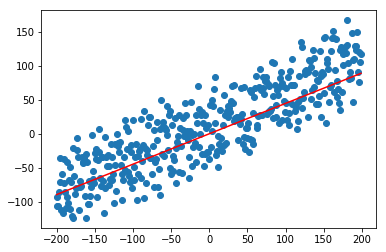

In [7]:
# Visualize the intermediate trained model
epochs_list = [1, 200, 400, 600, 800, 1000]

for i in range(len(epochs_list)):
    plt.scatter(X, y)   # scatter the original data
    
    # Load trained weights in specific epoch
    epoch = epochs_list[i] - 1   # In python, all indexes start from 0
    w = w_list[epoch]
    b = b_list[epoch]
    
    y_pred = w * X + b
    plt.plot(X, y_pred, color='red')
    plt.show()

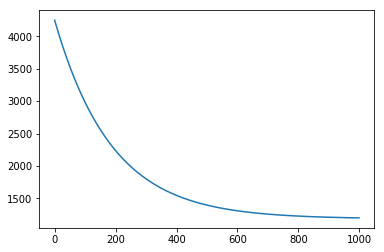

In [8]:
# Visualize the change of loss
plt.plot(loss_list)
plt.show()

### [P1.2] You should find an optimal linear regression model using Gradient Descent <font color=red>with Tensorflow.</font>

In [9]:
# Training setting
epochs = 1000
learning_rate = 1e-7

# Model weights and bias parameters
w = tf.Variable(0.0)
b = tf.Variable(0.0)

# Perform Gradient Descent
for i in range(epochs):
    
    
#################################################

    # Define MSE loss function (Hint: tf.GradientTape(), tf.reduce_mean())
    with tf.GradientTape() as tape:
        loss = tf.reduce_mean((y - (w * X + b))**2)
        
    # Get gradients of parameters (Hint: tape.gradient())
    dw, db = tape.gradient(loss, [w, b])
    
    # Update model weights and bias (Hint : assign_sub())
    w.assign_sub(learning_rate * dw)
    b.assign_sub(learning_rate * db)
    
#################################################


# Convert parameters type from tensor to numpy
w = w.numpy()
b = b.numpy()

print('Trained model weights : %.4f' % w)
print('Trained model bias : %.4f' % b)

Trained model weights : 0.4463
Trained model bias : 0.0024


### Let's visualize the trained results.

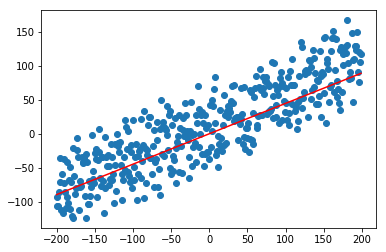

In [10]:
# Visualize the trained linear regression model
plt.scatter(X, y)   # scatter the original data
y_pred = w * X + b
plt.plot(X, y_pred, color='red')
plt.show()

### Trained model parameters are exactly same.
### If you use Tensorflow, you don't have to calculate gradients by hand!

## [Problem 2] Polynomial Regression

### In real world, there are a lot of complex data which are difficult to express linearly.

In [11]:
# Making polynomial data
n = 3 # degree of the polynomial

roots = np.random.uniform(-1, 1, n)   # Generates random roots for a 5th degree polynomial
polyCoefficients = np.poly(roots)   # Find coefficients of polynomial that has said roots

X = np.arange(-100, 100)   # Randomly generated X values
y = np.polyval(polyCoefficients, X)   # Corresponding Y values passed through polynomial

delta = np.random.uniform(-300000, 300000, size=(200,))
y += delta

with open('./data/polynomial_regression.pickle', 'wb') as f:
    pickle.dump([X, y], f)

In [12]:
# Load the dataset
with open('./data/polynomial_regression.pickle', 'rb') as f:
    X, y = pickle.load(f)

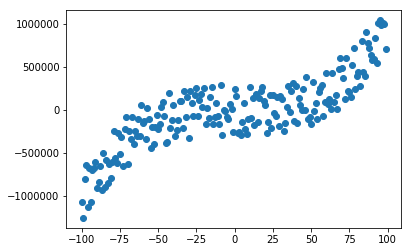

In [13]:
# Check the dataset distribution    
plt.scatter(X, y)
plt.show()

### [P2.1] First, you need to find an optimal linear regression model using Gradient Descent <font color=red>with Tensorflow.</font>

In [14]:
# Training setting
epochs = 1000
learning_rate = 1e-7

# Model weights and bias parameters
w = tf.Variable(0.0)
b = tf.Variable(0.0)

# Perform Gradient Descent
for i in range(epochs):
    
    
#################################################
############# Hint : Same as before #############

    # Define MSE loss function (Hint: tf.GradientTape(), tf.reduce_mean())
    with tf.GradientTape() as tape:
        loss = tf.reduce_mean((y - (w * X + b))**2)
        
    # Get gradients of parameters (Hint: tape.gradient())
    dw, db = tape.gradient(loss, [w, b])
    
    # Update model weights and bias (Hint : assign_sub())
    w.assign_sub(learning_rate * dw)
    b.assign_sub(learning_rate * db)
    
#################################################


# Convert parameters type from tensor to numpy
w = w.numpy()
b = b.numpy()

print('Trained model weights : %.4f' % w)
print('Trained model bias : %.4f' % b)

Trained model weights : 2871.6189
Trained model bias : -4.2411


### Let's visualize the trained results.

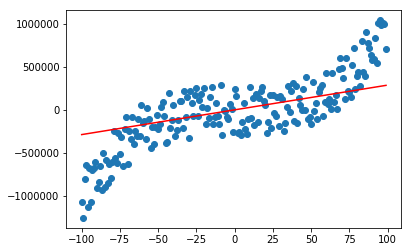

In [15]:
# Visualize the trained linear regression model
plt.scatter(X, y)   # scatter the original data
y_pred = w * X + b
plt.plot(X, y_pred, color='red')
plt.show()

### The linear regression model does not seem to fit well.
### Maybe, a more complex model can better represent the given dataset.

## [P2.2] Next, you need to find an optimal <font color=red>polynomial regression model</font> using Gradient Descent <font color=red>with Tensorflow.</font>

### Learn a cubic regression model.
\begin{equation*}
f(x) = w_1X^3 + w_2X^2 + w_3X + b
\end{equation*}

In [16]:
# Training setting
epochs = 1000
learning_rate = 1e-14


#################################################
### Define model weights and bias parameters ###
w1 = tf.Variable(0.0)
w2 = tf.Variable(0.0)
w3 = tf.Variable(0.0)
b = tf.Variable(0.0)

# Perform Gradient Descent
for i in range(epochs):
    
####### Hint : Consider multiple weights  #######

    # Define MSE loss function (Hint: tf.GradientTape(), tf.reduce_mean())
    with tf.GradientTape() as tape:
        loss = tf.reduce_mean(tf.square(y - (w1*X**3 + w2*X**2 + w3*X + b)))
        
    # Get gradients of parameters (Hint: tape.gradient())
    dw1, dw2, dw3, db = tape.gradient(loss, [w1, w2, w3, b])
    
    # Update model weights and bias (Hint : assign_sub())
    w1.assign_sub(learning_rate * dw1)
    w2.assign_sub(learning_rate * dw2)
    w3.assign_sub(learning_rate * dw3)
    b.assign_sub(learning_rate * db)
    
    
# Convert parameters type from tensor to numpy
w1 = w1.numpy()
w2 = w2.numpy()
w3 = w3.numpy()
b = b.numpy()

# Print the trained parameters value
print('Trained model weights 1 : %.4f' % w1)
print('Trained model weights 2 : %.4f' % w2)
print('Trained model weights 3 : %.4f' % w3)
print('Trained model bias : %.4f' % b)

#################################################

Trained model weights 1 : 0.9427
Trained model weights 2 : -0.0021
Trained model weights 3 : 0.0001
Trained model bias : -0.0000


### Let's visualize the trained results.

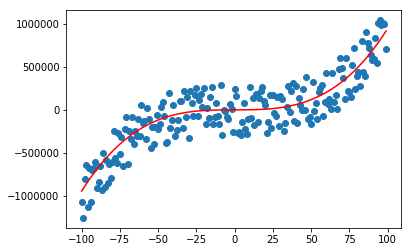

In [17]:
# Visualize the trained linear regression model
plt.scatter(X, y)   # scatter the original data
y_pred = w1*X**3 + w2*X**2 + w3*X + b
plt.plot(X, y_pred, color='red')
plt.show()

## [Problem 3] Logistic Regression (Classification)

In [18]:
# Load the dataset
data = pd.read_csv('./data/logistic_regression.csv')
data.head()   # show the 5 elements

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [19]:
data.to_pickle('./data/logistic_regression.pickle')

In [20]:
with open('./data/logistic_regression.pickle', 'rb') as f:
    data = pickle.load(f)
    
data.head()   # show the 5 elements

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Now, we are going to train logistic regression model to classify whether a user purchased or not, based on the 'Age' information.

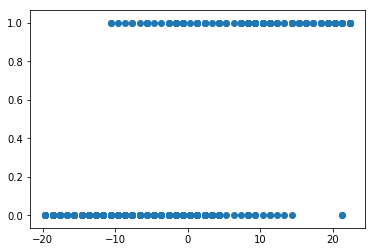

In [21]:
# Extract 'Age' and 'Purchased' data
X = data['Age'].to_numpy(dtype=np.float32)
y = data['Purchased'].to_numpy()

# Normalize 'Age' value
def normalize(X):
    return X - X.mean()
X = normalize(X)

# Visualizing the dataset
plt.scatter(X, y)
plt.show()

### You can see the tendency <font color=red> not to purchase(y=0)</font> for the younger and <font color=red>to purchase(y=1)</font> for the older.

## [P3.1] You should find an optimal logistic regression model using Gradient Descent <font color=red>without Tensorflow.</font>

### The shape of Logistic function is S-shaped curve and it maps to a value between 0 and 1.
### Logistic regression model can classify the data based on 0.5 value from the perspective of probability.
### You can train a model to <font color=red>minimize -likelihood function(=maximize likelihood function).</font>

**Logistic regression**
\begin{equation*}
P(y_i=1|X_i) = \frac{1}{1 + e^{-(wX_i + b)}}
\end{equation*}

**Likelihood loss**
\begin{equation*}
-\frac{1}{n} \sum_{i=1}^n (y_i * log(P(y_i=1|X_i)) + (1 - y_i) * log(1 - P(y_i=1|X_i)))
\end{equation*}

**Gradients calculation**
\begin{equation*}
\frac{\partial L}{\partial w} = \frac{1}{n} \sum_{i=1}^n ((P(y_i=1|X_i) - y_i) * X_i)
\end{equation*}

\begin{equation*}
\frac{\partial L}{\partial w} = \frac{1}{n} \sum_{i=1}^n (P(y_i=1|X_i) - y_i)
\end{equation*}



In [22]:
# Training setting
epochs = 1000
learning_rate = 1e-3

# Model weights and bias parameters
w = 0.0
b = 0.0

# Perform Gradient Descent
for i in range(epochs):
    
    
#################################################
######## Hint: use +, -, *, /, **, np.mean(), #######
########           np.exp(), np.log() ###########
    y_pred = 1 / (1 + np.exp(-(w*X + b)))   # Logistic regression
    loss = -np.mean(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))   # Likelihood loss
    
    dw = np.mean((y_pred - y) * X)   # gradients w.r.t to w
    db = np.mean(y_pred - y)   # gradients w.r.t to b
    
    # Update model weights and bias
    w = w - learning_rate * dw
    b = b - learning_rate * db
    
#################################################


print('Trained model weights : %.4f' % w)
print('Trained model bias : %.4f' % b)

Trained model weights : 0.1696
Trained model bias : -0.1248


### Let's visualize the trained results.

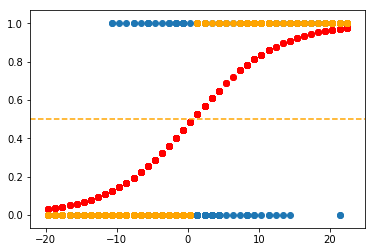

In [23]:
# Visualize the trained linear regression model
plt.scatter(X, y)   # scatter the original data
y_pred = 1 / (1 + np.exp(-(w*X + b)))
plt.scatter(X, y_pred, color='red')
plt.axhline(y=0.5, color='orange', linestyle='--')   # show 0.5 threshold line

# Accurate results are colored as orange
index1 = (y == 0) * (y_pred < 0.5)
index2 = (y == 1) * (y_pred > 0.5)
index = index1 + index2
plt.scatter(X[index], y[index], color='orange')

plt.show()

## [P3.2] You should find an optimal logistic regression model using Gradient Descent <font color=red>with Tensorflow.</font>

In [24]:
# Training setting
epochs = 1000
learning_rate = 1e-3

# Model weights and bias parameters
w = tf.Variable(0.0)
b = tf.Variable(0.0)

# Perform Gradient Descent
for i in range(epochs):
    
    
#################################################

    # Define Likelihood loss function (Hint: tf.GradientTape(), tf.reduce_mean())
    with tf.GradientTape() as tape:
        y_pred = 1/(1 + tf.exp(-(w*X + b)))
        loss = -tf.reduce_mean(y * tf.math.log(y_pred) +(1-y) * tf.math.log(1-y_pred))
        
    # Get gradients of parameters (Hint: tape.gradient())
    dw, db = tape.gradient(loss, [w, b])
    
    # Update model weights and bias (Hint : assign_sub())
    w.assign_sub(learning_rate * dw)
    b.assign_sub(learning_rate * db)
    
#################################################


# Convert parameters type from tensor to numpy
w = w.numpy()
b = b.numpy()

print('Trained model weights : %.4f' % w)
print('Trained model bias : %.4f' % b)

Trained model weights : 0.1696
Trained model bias : -0.1248


### Let's visualize the trained results.

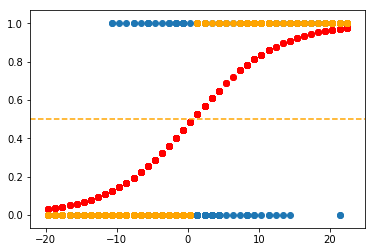

In [25]:
# Visualize the trained linear regression model
plt.scatter(X, y)   # scatter the original data
y_pred = 1 / (1 + tf.exp(-(w*X + b)))
plt.scatter(X, y_pred, color='red')
plt.axhline(y=0.5, color='orange', linestyle='--')   # show 0.5 threshold line

# Accurate results are colored as orange
index1 = (y == 0) * (y_pred.numpy() < 0.5)
index2 = (y == 1) * (y_pred.numpy() > 0.5)
index = index1 + index2
plt.scatter(X[index], y[index], color='orange')

plt.show()